# Using RawFile

In [1]:
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt
import boost_histogram as bh
import time

#Python cluster reader
from creader import RawFile
path = Path('/mnt/sls_det_storage/moench_data/cluster_reader_test/')

## Moench03 data

Fetches info from the master file

### Frames only

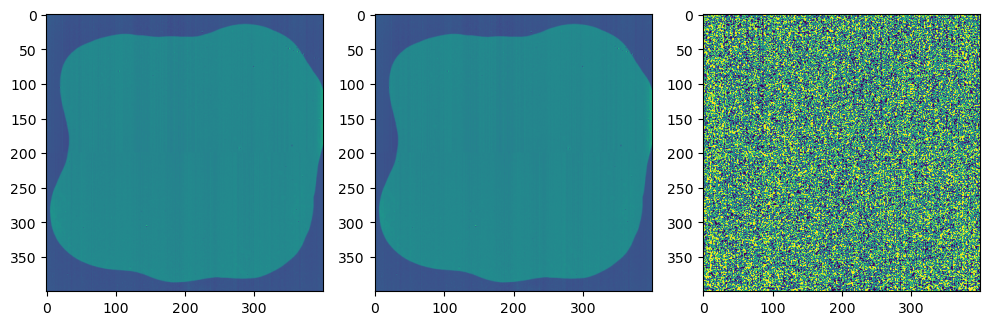

In [2]:
with RawFile(path/'Moench03_master_0.json') as f:
    frames = f.read(100)
    
fig, ax = plt.subplots(1,3, figsize = (10,5))
im0 = ax[0].imshow(frames[0])
im1 = ax[1].imshow(frames[9])
im1 = ax[2].imshow(frames[0]-frames[9])
fig.tight_layout()

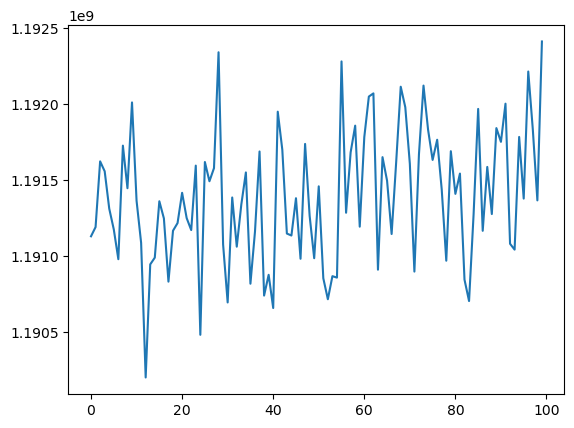

In [3]:
fig, ax = plt.subplots()
ax.plot(frames.sum(axis =1).sum(axis = 1))

### Frames and header

In [4]:
with RawFile(path/'Moench03_master_0.json', header = True) as f:
    frames, header = f.read(10)
    
    
print(f'{"Frame Number,":<15} {"Timestamp":<10}')
for h in header:
    print(f"{h['Frame Number']:<15} {h['Timestamp']:<10}")

Frame Number,   Timestamp 
201             1107824650
202             1108024651
203             1108224652
204             1108424653
205             1108624654
206             1108824655
207             1109024656
208             1109224657
209             1109424658
210             1109624659


## Moench 04 data

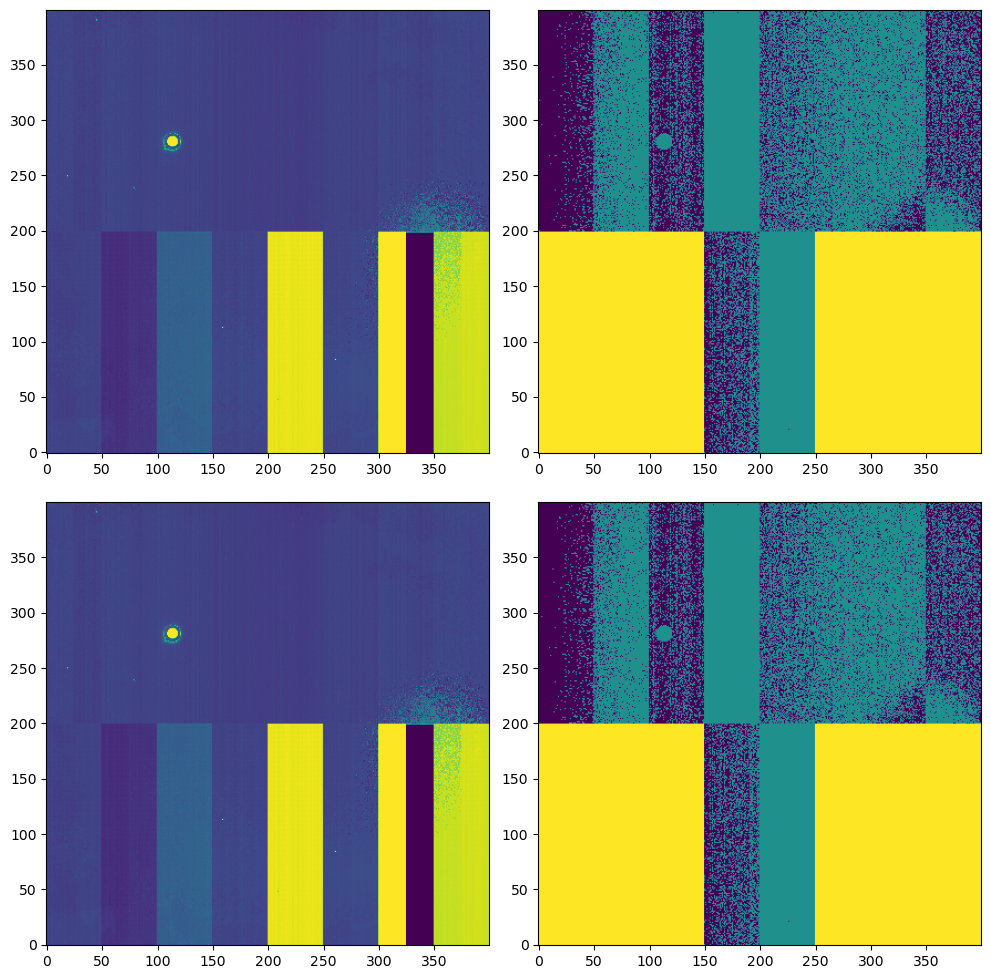

In [5]:
#if the file has analog and digital data it's automatically read

with RawFile(path/'Moench04_digital_master_0.raw', header = True) as f:
    analog, digital, header = f.read(20)
    
fig, ax = plt.subplots(2,2, figsize = (10,10))
im0 = ax[0][0].imshow(analog[0], origin = 'lower')
im1 = ax[0][1].imshow(digital[0], origin = 'lower')
im2 = ax[1][0].imshow(analog[9], origin = 'lower')
im3 = ax[1][1].imshow(digital[9], origin = 'lower')

fig.tight_layout()